### Introduction
Every company is trying to get to know its customers better. The goal is that companies can make marketing strategies that are more appropriate and efficient for each customer. The goal of this task is using machine learning to create a model that can Clustering types of consumers. <br>
`Data get from : https://storage.googleapis.com/dqlab-dataset/customer_segments.txt`

### Tabel of Content
1. Data Loading
2. Data Exploration
3. Data Preparation
4. Modelling
5. Deploymeny Models

### Input Variable
`Customer ID`: Customer code with mixed text format CUST- followed by a number <br>
`Customer Name`: The name of the customer in text format of course <br>
`Gender`: The gender of the customer, there are only two data content categories, namely Male and Female <br>
`Age`: Age of the customer in numeric format <br>
`Profession`: The profession of the customer, also in the type of category text consisting of Entrepreneur, Student, `Professional`, Housewife, and Student. <br>
`Resident Type`: The type of residence of our customers, for this dataset there are only two categories: Cluster and Sector. <br>
`Annual Spending Value`: Represents the total expenditure that has been issued by the customer. <br>

### Import Library

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import pickle
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

### Import Data Set

In [30]:
#import dataset  
customer_df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")  

In [31]:
customer_df.dtypes

Customer_ID            object
Nama Pelanggan         object
Jenis Kelamin          object
Umur                    int64
Profesi                object
Tipe Residen           object
NilaiBelanjaSetahun     int64
dtype: object

In [32]:
print(customer_df.head(2))
print('\n Number of Columns and Rows: ',customer_df.shape)

  Customer_ID    Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0    CUST-001      Budi Anggara          Pria    58  Wiraswasta       Sector   
1    CUST-002  Shirley Ratuwati        Wanita    14     Pelajar      Cluster   

   NilaiBelanjaSetahun  
0              9497927  
1              2722700  

 Number of Columns and Rows:  (50, 7)


### Data Exploration

#### Eksplorasi Data Numeric 

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: None, or a number
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: unknown
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float

<Figure size 432x288 with 0 Axes>

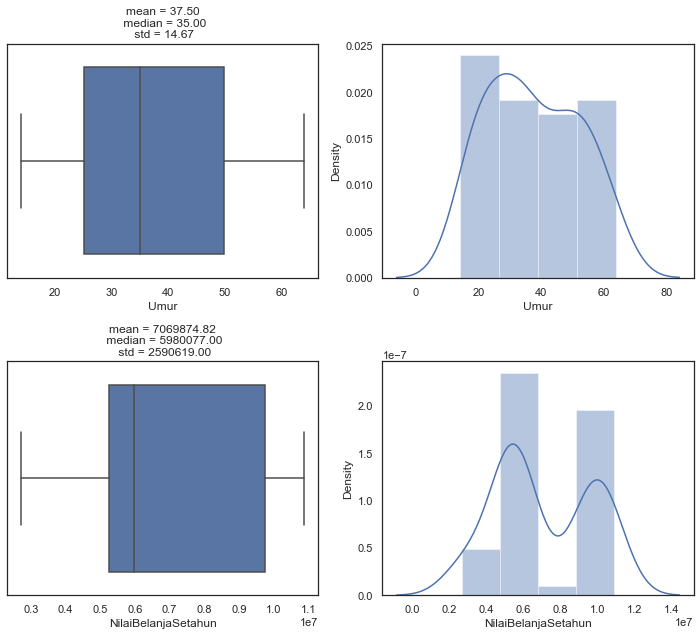

In [33]:
#Eksplorasi Data Numerik
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
plt.clf()

#Create a plot
def observasi_num(features):
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
        sns.boxplot(customer_df[kol], ax = axs[i][0])
        sns.distplot(customer_df[kol], ax = axs[i][1])
        axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(customer_df[kol].mean(), customer_df[kol].median(), customer_df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()

column_numerik = ['Umur','NilaiBelanjaSetahun']
observasi_num(column_numerik)

#### Eksplorasi Data Kategorical

Test: 0
Test: 1
Test: 2


<Figure size 432x288 with 0 Axes>

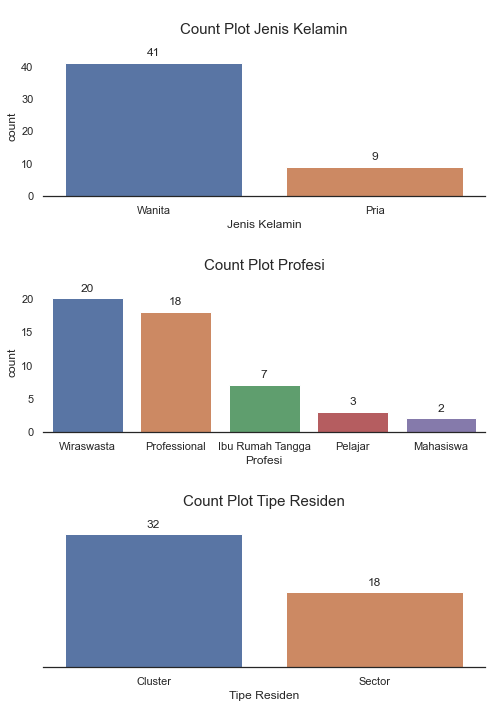

In [34]:
#Eksplorasi Data Kategorical
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
plt.clf()

column_categorical = ['Jenis Kelamin','Profesi','Tipe Residen']

fig, axs = plt.subplots(3,1,figsize=(7,10))

# Create a plot
for i, kol in enumerate(column_categorical):
    sns.countplot(customer_df[kol], order = customer_df[kol].value_counts().index, ax = axs[i])
    print("Test:", i)
    axs[i].set_title('\nCount Plot %s\n'%(kol), fontsize=15)
    for p in axs[i].patches:
        axs[i].annotate(format(p.get_height(), '.0f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center',va = 'center',xytext = (0, 10),textcoords = 'offset points')

#Setting Plot
sns.despine(right=True,top = True, left = True)
axs[i].axes.yaxis.set_visible(False)
plt.tight_layout()

plt.show()

#### Conlusions
From the results of the data exploration, we can get the following information:

1. The average age of the customer is 37.5 years
2. The average value of spending a year is 7,069,874.82
3. The gender of the customer is dominated by 41 women (82%) and 9 men (18%)
4. Most professions are Entrepreneurs (40%) followed by Professionals (36%) and others (24%) Of all customers, 64% of them live in clusters and 36% live in sectors

###  Data Preparation
#### Column standarisation

In [35]:
# Column Numerik
from sklearn.preprocessing import StandardScaler

kolom_numerik = ['Umur','NilaiBelanjaSetahun']

# Statistik Before Standardisasi
print('Statistik Before Standardisasi\n')
print(customer_df[kolom_numerik ].describe().round(1))

# Standardisasi
df_std = StandardScaler().fit_transform(customer_df[kolom_numerik])

df_std = pd.DataFrame(data=df_std, index=customer_df.index, columns=customer_df[kolom_numerik].columns)

print('Result of standardisasi\n')
print(df_std.head())

print('Statistik standardisasi\n')
print(df_std.describe().round(0))

Statistik Before Standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0
Result of standardisasi

       Umur  NilaiBelanjaSetahun
0  1.411245             0.946763
1 -1.617768            -1.695081
2  0.722833            -0.695414
3  1.067039            -0.727361
4  0.240944             1.382421
Statistik standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean    0.0                 -0.0
std     1.0                  1.0
min    -2.0                 -2.0
25%    -1.0                 -1.0
50%    -0.0                 -0.0
75%     1.0                  1.0
max     2.0                  1.0


<b>We can get information that : </b>
<BR>After standardizing the mean and standard deviation of each variable to 0 and 1. This shows that our data is on the same scale.

#### Categorical Conversion of Data with Label Encoderder

In [36]:
# Konversi categorical Data with Label Encoder

from sklearn.preprocessing import LabelEncoder
# Inisiasi kolom categorical
column_categorical = ['Jenis Kelamin','Profesi','Tipe Residen']
df_encode = customer_df[column_categorical].copy()
print(df_encode.dtypes)
for col in column_categorical:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

print(df_encode.head())

Jenis Kelamin    object
Profesi          object
Tipe Residen     object
dtype: object
   Jenis Kelamin  Profesi  Tipe Residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0


#### Combining Data for Modeling

In [37]:
df_model = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')
print (df_model.head())

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             1  1.411245             0.946763
1              1        2             0 -1.617768            -1.695081
2              0        3             0  0.722833            -0.695414
3              0        3             0  1.067039            -0.727361
4              1        4             0  0.240944             1.382421


### Modelling

#### Finding the Optimal Number of Clusters

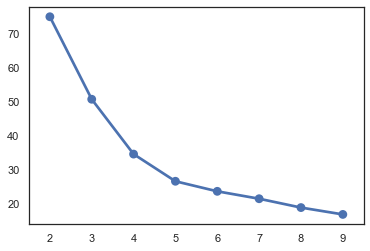

In [41]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Doing Iteration to Get Cost . value
cost = {}
for k in range(2,10):
    kproto = KPrototypes(n_clusters = k,random_state=75)
    kproto.fit_predict(df_model, categorical=[0,1,2])
    cost[k]= kproto.cost_

sns.pointplot(x=list(cost.keys()), y=list(cost.values()))
plt.show()

#### Create Model

In [42]:
df_model.head(2)

,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,1,1.411245,0.946763
1,1,2,0,-1.617768,-1.695081


In [43]:
import pickle
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=5, random_state = 75)
kproto = kproto.fit(df_model, categorical=[0,1,2])

#Save Model
pickle.dump(kproto, open('cluster.pkl', 'wb'))

#### Implementation Models

In [45]:
# Determine the segment of each customer
clusters =  kproto.predict(df_model, categorical=[0,1,2])    
print('segment of each customer : {}\n'.format(clusters))    
      
df_final = df_model    
df_final['cluster'] = clusters    
print(df_final.head())

segment of each customer : [1 0 2 2 3 4 1 2 4 4 2 2 1 1 3 4 4 2 3 0 3 2 4 3 3 2 3 4 2 2 0 1 0 3 4 3 4
 1 4 0 4 3 4 3 4 3 2 1 4 1]

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun  \
0              0        4             1  1.411245             0.946763   
1              1        2             0 -1.617768            -1.695081   
2              0        3             0  0.722833            -0.695414   
3              0        3             0  1.067039            -0.727361   
4              1        4             0  0.240944             1.382421   

   cluster  
0        1  
1        0  
2        2  
3        2  
4        3  


#### Showing Clusters of Each Customer

In [46]:
# Display customer data based on its cluster
for i in range (0,5):
    print('\n cluster: {}\n'.format(i))
    print(df_final[df_final['cluster']== i])


 cluster: 0

    Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun  \
1               1        2             0 -1.617768            -1.695081   
19              1        2             1 -1.480086            -1.627177   
30              1        1             0 -1.273562            -1.570276   
32              1        1             0 -1.273562            -1.568267   
39              1        2             1 -1.617768            -1.640821   

    cluster  
1         0  
19        0  
30        0  
32        0  
39        0  

 cluster: 1

    Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun  \
0               0        4             1  1.411245             0.946763   
6               0        4             1  1.824292             1.079078   
12              1        4             0  1.824292             0.882519   
13              0        4             0  1.548927             0.936504   
31              1        4             1  0.653991            

#### Visualization of Clustering Results - Box Plot

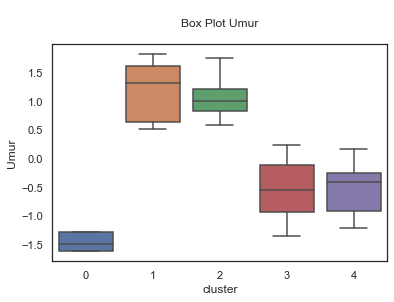

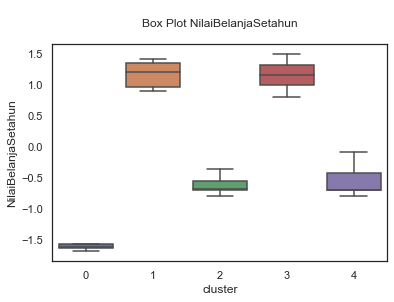

In [48]:
import matplotlib.pyplot as plt
# Data Numerical
kolom_numerik = ['Umur','NilaiBelanjaSetahun']

for i in kolom_numerik:
    plt.figure(figsize=(6,4))
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()

#### Visualization of Clustering Results - Count Plot

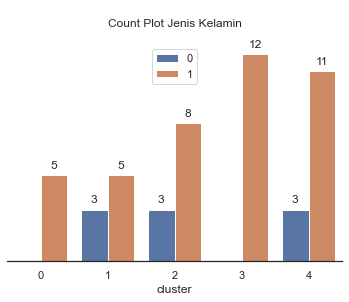

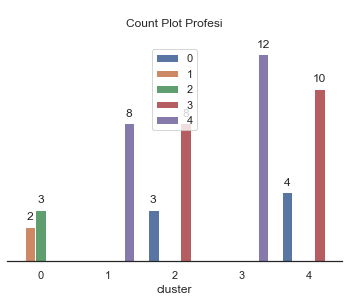

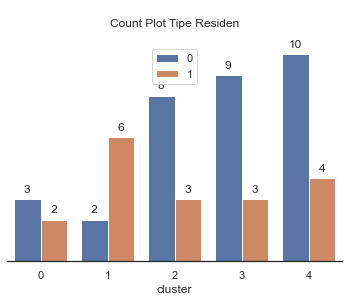

In [49]:
import matplotlib.pyplot as plt
# Data Kategorikal
kolom_categorical = ['Jenis Kelamin','Profesi','Tipe Residen']

for i in kolom_categorical:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)
    ax.legend(loc="upper center")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0, 10),
        textcoords = 'offset points')

    sns.despine(right=True,top = True, left = True)
    ax.axes.yaxis.set_visible(False)
    plt.show()

### Name the Cluster
1. Cluster 0: Diamond Young Entrepreneur, the contents of this cluster are entrepreneurs who have an average transaction value of close to 10 million. In addition, the contents of this cluster have an age of about 18 - 41 years with an average of 29 years.
2. Cluster 1: Diamond Senior Entrepreneur, the contents of this cluster are entrepreneurs who have an average transaction value of close to 10 million. The contents of this cluster have an age of about 45 - 64 years with an average of 55 years.
3. Cluster 2: Silver Students, the contents of this cluster are students with an average age of 16 years and a yearly expenditure value of close to 3 million.
4. Cluster 3: Gold Young Members, the contents of this cluster are young professionals and housewives with an age range of around 20 - 40 years and with an average of 30 years and the annual expenditure value is close to 6 million.
5. Cluster 4: Gold Senior Members, the contents of this cluster are professionals and housewives who are old with an age range of 46 - 63 years and with an average of 53 years and the annual expenditure value is close to 6 million.

In [50]:
# Mapping column name
df_final['segmen'] = df_final['cluster'].map({
    0: 'Diamond Young Member',
    1: 'Diamond Senior Member',
    2: 'Silver Member',
    3: 'Gold Young Member',
    4: 'Gold Senior Member'
})

print(df_final.info())
print(df_final.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Jenis Kelamin        50 non-null     int32  
 1   Profesi              50 non-null     int32  
 2   Tipe Residen         50 non-null     int32  
 3   Umur                 50 non-null     float64
 4   NilaiBelanjaSetahun  50 non-null     float64
 5   cluster              50 non-null     uint16 
 6   segmen               50 non-null     object 
dtypes: float64(2), int32(3), object(1), uint16(1)
memory usage: 2.0+ KB
None
   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun  \
0              0        4             1  1.411245             0.946763   
1              1        2             0 -1.617768            -1.695081   
2              0        3             0  0.722833            -0.695414   
3              0        3             0  1.067039            -0.727361   


### Deployment Model

In [51]:
# New Data
data = [{
    'Customer_ID': 'CUST-100' ,
    'Nama Pelanggan': 'Joko' ,
    'Jenis Kelamin': 'Pria',
    'Umur': 45,
    'Profesi': 'Wiraswasta',
    'Tipe Residen': 'Cluster' ,
    'NilaiBelanjaSetahun': 8230000

}]

# Create Data Frame
new_df = pd.DataFrame(data)
print(new_df)

  Customer_ID Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0    CUST-100           Joko          Pria    45  Wiraswasta      Cluster   

   NilaiBelanjaSetahun  
0              8230000  


#### Create a Function

In [52]:
def data_preprocess(data):
    # Konversi Categorical data
    kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']

    df_encode = data[kolom_kategorikal].copy()

    ## Sex
    df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({
    'Pria': 0,
    'Wanita' : 1
    })

    ## Profesi
    df_encode['Profesi'] = df_encode['Profesi'].map({
    'Ibu Rumah Tangga': 0,
    'Mahasiswa' : 1,
    'Pelajar': 2,
    'Professional': 3,
    'Wiraswasta': 4
    })

    ## Tipe Residen
    df_encode['Tipe Residen'] = df_encode['Tipe Residen'].map({
    'Cluster': 0,
    'Sector' : 1
    })

    # Standardisasi Numerical Data
    kolom_numerik = ['Umur','NilaiBelanjaSetahun']
    df_std = data[kolom_numerik].copy()

    ## Standardisasi Column Umur
    df_std['Umur'] = (df_std['Umur'] - 37.5)/14.7

    ## Standardisasi Column Nilai Belanja Setahun
    df_std['NilaiBelanjaSetahun'] = (df_std['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0

    # Combine Categorical and numerical data
    df_model = df_encode.merge(df_std, left_index = True,
    right_index=True, how = 'left')

    return df_model

# Running function
new_df_model = data_preprocess(new_df)

print(new_df_model)

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             0  0.510204             0.447818


In [53]:
def modelling (data):
    kpoto = pickle.load(open('cluster.pkl', 'rb'))
    clusters = kpoto.predict(data,categorical=[0,1,2])
    return clusters

clusters = modelling(new_df_model)

print(clusters)

[1]


In [55]:
def menamakan_segmen (data_asli, clusters):

    # Combine cluster and first data
    final_df = data_asli.copy()
    final_df['cluster'] = clusters

    # Name segmen
    final_df['segmen'] = final_df['cluster'].map({
    0: 'Diamond Young Member',
    1: 'Diamond Senior Member',
    2: 'Silver Students',
    3: 'Gold Young Member',
    4: 'Gold Senior Member'
    })

    return final_df

new_final_df = menamakan_segmen(new_df,clusters)

print(new_final_df)

  Customer_ID Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0    CUST-100           Joko          Pria    45  Wiraswasta      Cluster   

   NilaiBelanjaSetahun  cluster                 segmen  
0              8230000        1  Diamond Senior Member  
